# Load Data

In [115]:
file = open('royal_data.txt','r')
royal_data = file.readlines()
royal_data

['The future king is the prince\n',
 'Daughter is the princess\n',
 'Son is the prince\n',
 'Only a man can be a king\n',
 'Only a woman can be a queen\n',
 'The princess will be a queen\n',
 'The prince is a strong man\n',
 'The princess is a beautiful woman\n',
 'Prince is only a boy now\n',
 'Prince will be king\n',
 'A boy will be a man']

# Prepreoces

### Lowercase and remove special characters

In [116]:
for index,sentence in enumerate(royal_data):
    royal_data[index] = sentence.lower().replace('\n','')

In [117]:
royal_data

['the future king is the prince',
 'daughter is the princess',
 'son is the prince',
 'only a man can be a king',
 'only a woman can be a queen',
 'the princess will be a queen',
 'the prince is a strong man',
 'the princess is a beautiful woman',
 'prince is only a boy now',
 'prince will be king',
 'a boy will be a man']

### Remove StopWords and Tokenize

In [118]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = stopwords.words('english')

In [119]:
filtered_royal_data = [[word for word in word_tokenize(sentence) if word not in stopwords] for sentence in royal_data ]

In [120]:
filtered_royal_data

[['future', 'king', 'prince'],
 ['daughter', 'princess'],
 ['son', 'prince'],
 ['man', 'king'],
 ['woman', 'queen'],
 ['princess', 'queen'],
 ['prince', 'strong', 'man'],
 ['princess', 'beautiful', 'woman'],
 ['prince', 'boy'],
 ['prince', 'king'],
 ['boy', 'man']]

# Creating Bigrams

In [121]:
bigrams = []

### Permutations

# for words_list in filtered_royal_data:
#     for i in range(len(words_list) - 1):
#         for j in range(i+1, len(words_list)):
#             bigrams.append([words_list[i],words_list[j]])
#             bigrams.append([words_list[j],words_list[i]])
            
### Using List Comprehension
        
bigrams = [ [words_list[i],words_list[j]] for words_list in filtered_royal_data for i in range(len(words_list[:-1])) for j in range(i+1,len(words_list)) ] +  [ [words_list[j],words_list[i]] for words_list in filtered_royal_data for i in range(len(words_list[:-1])) for j in range(i+1,len(words_list)) ]



In [122]:
print(bigrams)

[['future', 'king'], ['future', 'prince'], ['king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong'], ['prince', 'man'], ['strong', 'man'], ['princess', 'beautiful'], ['princess', 'woman'], ['beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man'], ['king', 'future'], ['prince', 'future'], ['prince', 'king'], ['princess', 'daughter'], ['prince', 'son'], ['king', 'man'], ['queen', 'woman'], ['queen', 'princess'], ['strong', 'prince'], ['man', 'prince'], ['man', 'strong'], ['beautiful', 'princess'], ['woman', 'princess'], ['woman', 'beautiful'], ['boy', 'prince'], ['king', 'prince'], ['man', 'boy']]


# Vocabulary

In [123]:
all_words = []
all_words = [words for sublist in filtered_royal_data for words in sublist]
all_words = list(set(all_words))
all_words = sorted(all_words)

In [124]:
all_words

['beautiful',
 'boy',
 'daughter',
 'future',
 'king',
 'man',
 'prince',
 'princess',
 'queen',
 'son',
 'strong',
 'woman']

# One Hot Encoding

In [125]:
word_dict = {}

word_dict = {word : counter for counter,word in enumerate(all_words)}
word_dict

{'beautiful': 0,
 'boy': 1,
 'daughter': 2,
 'future': 3,
 'king': 4,
 'man': 5,
 'prince': 6,
 'princess': 7,
 'queen': 8,
 'son': 9,
 'strong': 10,
 'woman': 11}

In [126]:
import numpy as np

length = len(all_words)
onehot_data = np.zeros((length,length))

for i in range(len(all_words)):
    onehot_data[i][i] = 1

onehot_dict = { all_words[i] : onehot_data[i] for i in range(length) }

In [127]:
onehot_dict

{'beautiful': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'boy': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'daughter': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'future': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'king': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'man': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'prince': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'princess': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'queen': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'son': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'strong': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'woman': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

# Input and Output

In [128]:
X = []
Y = []

X += [onehot_dict[bigram[0]] for bigram in bigrams]
Y += [onehot_dict[bigram[1]] for bigram in bigrams]

X = np.array(X)
Y = np.array(Y)

# Model

In [129]:
from keras.models import Sequential
from keras.layers import Dense,Input

In [130]:
model = Sequential()

vocal_size = len(onehot_data[0])
embed_size = 2

model.add(Input(shape = (length,)))
model.add(Dense(2,activation = 'linear'))
model.add(Dense(length, activation = 'softmax'))


In [131]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [132]:
model.fit(X,Y,epochs = 1000,verbose=0)

# Get Weights

In [133]:
weights = model.get_weights()[0]

In [134]:
weights

array([[ 0.86387277,  0.08497349],
       [-0.8391545 , -1.0203488 ],
       [ 0.3922983 , -1.1898786 ],
       [-0.3551519 ,  0.39879328],
       [-0.8777074 , -1.2895781 ],
       [-0.70259494, -0.16552947],
       [-1.3971928 ,  0.5585323 ],
       [ 0.7832187 ,  1.5515822 ],
       [ 0.9580316 ,  0.54687136],
       [ 0.11496738, -0.37257338],
       [-0.32929674, -0.30732125],
       [ 0.7632942 ,  0.06440996]], dtype=float32)

In [135]:
word_embeddings = {}

word_embeddings = {all_words[i] : weights[i] for i in range(12)}

print(word_embeddings)

{'beautiful': array([0.86387277, 0.08497349], dtype=float32), 'boy': array([-0.8391545, -1.0203488], dtype=float32), 'daughter': array([ 0.3922983, -1.1898786], dtype=float32), 'future': array([-0.3551519 ,  0.39879328], dtype=float32), 'king': array([-0.8777074, -1.2895781], dtype=float32), 'man': array([-0.70259494, -0.16552947], dtype=float32), 'prince': array([-1.3971928,  0.5585323], dtype=float32), 'princess': array([0.7832187, 1.5515822], dtype=float32), 'queen': array([0.9580316 , 0.54687136], dtype=float32), 'son': array([ 0.11496738, -0.37257338], dtype=float32), 'strong': array([-0.32929674, -0.30732125], dtype=float32), 'woman': array([0.7632942 , 0.06440996], dtype=float32)}


# Plot

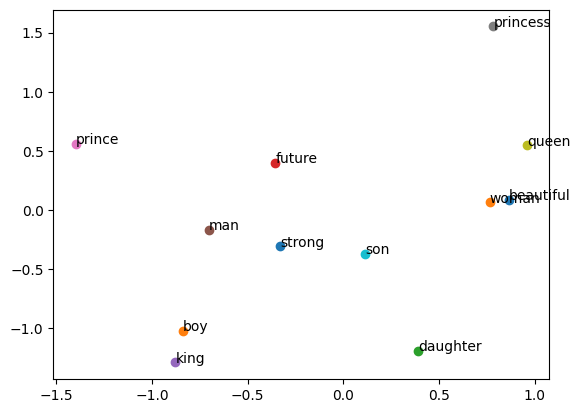

In [136]:
import matplotlib.pyplot as plt

for word in all_words:
    coordinates = word_embeddings[word]
    plt.scatter(coordinates[0],coordinates[1])
    plt.annotate(word,(coordinates[0],coordinates[1]))